In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("aqardata_2.csv")


In [3]:
print(data.shape)
data.head()

(2951, 8)


,mainlocation,sublocation,neighborhood,frontage,purpose,streetwidth,size,Pricepm
0,الرياض,غرب الرياض,حي ظهرة لبن,شمال,سكني,20.0,727,1800
1,بريدة,NaN,حي مشعل,غرب,NaN,15.0,450,950
2,الخبر,NaN,حي الحمرا,غرب,تجاري,100.0,1450,3500
3,الخبر,NaN,حي الحزام الاخضر,شرق,NaN,15.0,440,2700
4,بريدة,NaN,حي الرحاب,جنوب غربي,NaN,40.0,784,950


# Data analysis

In [4]:
data.describe()

,streetwidth,size,Pricepm
count,2948.000000,2.951000e+03,2951.000000
mean,24.691995,1.040184e+04,2624.025754
std,15.208720,2.033230e+05,2970.544618
min,1.000000,8.100000e+01,1.000000
25%,15.000000,5.750000e+02,1200.000000
50%,20.000000,8.250000e+02,2600.000000
75%,30.000000,1.350000e+03,3500.000000
max,100.000000,1.000000e+07,83333.000000


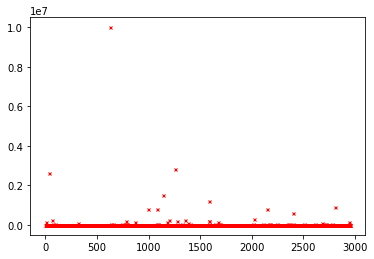

In [5]:
plt.plot(range(len(data["size"])),data["size"], color="none", marker="x",markersize=3,markeredgecolor="red")


## 1- Missing values

In [6]:
data.isna().sum()

mainlocation      0
sublocation     675
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

In [7]:
print(f"The percentage of nall values in:")
print(f"'sublocation'= {data.sublocation.isna().sum() / data.shape[0]}")
print(f"'sublocation'= {data.purpose.isna().sum() / data.shape[0]}")
print(f"'sublocation'= {data.streetwidth.isna().sum() / data.shape[0]}")

The percentage of nall values in:
'sublocation'= 0.22873602168756355
'sublocation'= 0.11758725855642155
'sublocation'= 0.0010166045408336157


In [8]:
# data.dropna(subset=["streetwidth","purpose"],inplace=True)
data.dropna(inplace=True)

data.isna().sum()

mainlocation    0
sublocation     0
neighborhood    0
frontage        0
purpose         0
streetwidth     0
size            0
Pricepm         0
dtype: int64

In [9]:
# print(f"The percentage of nall values after removing smoe values:")
# print(f"'sublocation'= {data.sublocation.isna().sum() / data.shape[0]}")

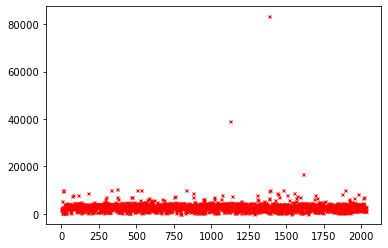

In [10]:
x=range(data.shape[0])
y=data["Pricepm"]
plt.plot(x,y, color="none", marker="x",markersize=3,markeredgecolor="red")
plt.show()

array([[<AxesSubplot:title={'center':'streetwidth'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'Pricepm'}>, <AxesSubplot:>]],
      dtype=object)

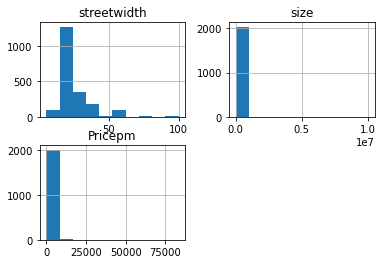

In [11]:
data.hist()

<AxesSubplot:>

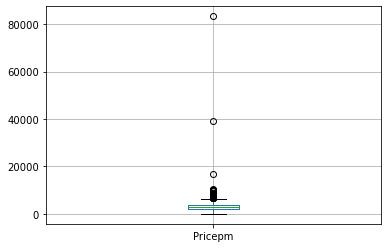

In [12]:
data.boxplot("Pricepm")

### >There are outliers in 'Pricepm'

<AxesSubplot:>

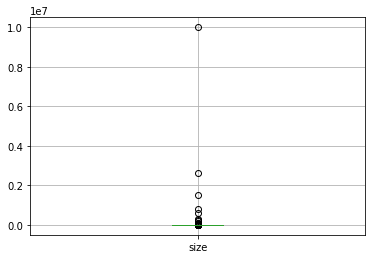

In [13]:
data.boxplot("size")

### >There are outliers in 'size'

<AxesSubplot:>

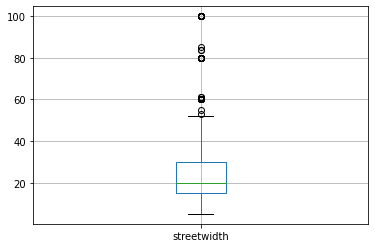

In [14]:
data.boxplot("streetwidth")

In [15]:
def removeOutliers(data,ft,min_t,max_t):
    min_threshold,max_threshold = data[ft].quantile([min_t,max_t]);

    print(f"min_threshold ={min_threshold}\nmax_threshold={max_threshold}")

    return data[(data["Pricepm"]>min_threshold) & (data["Pricepm"]<max_threshold)]

In [16]:
cleanData = removeOutliers(data,"Pricepm",0.05,0.95)

min_threshold =700.0
max_threshold=4900.0


<AxesSubplot:>

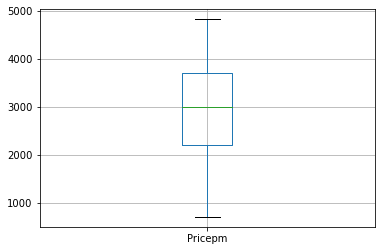

In [17]:
cleanData.boxplot("Pricepm")

In [18]:
cleanData

,mainlocation,sublocation,neighborhood,frontage,purpose,streetwidth,size,Pricepm
0,الرياض,غرب الرياض,حي ظهرة لبن,شمال,سكني,20.0,727,1800
5,الرياض,شمال الرياض,حي العارض,جنوب,تجاري,60.0,5973,2000
6,جدة,شمال جدة,حي الريان,شرق,سكني,20.0,660,2300
11,الرياض,جنوب الرياض,حي السلي,3 شوارع,تجاري,35.0,3200,1500
12,الرياض,شرق الرياض,حي اشبيلية,شمال غربي,سكني,20.0,743,2500
...,...,...,...,...,...,...,...,...
2940,جدة,شمال جدة,حي اللؤلؤ,شمال,سكني,25.0,300,2121
2942,الرياض,غرب الرياض,حي ظهرة نمار,شمال,سكني,13.0,750,1100
2943,جدة,شمال جدة,حي النزهة,3 شوارع,تجاري,60.0,36000,2777
2946,الرياض,جنوب الرياض,حي طيبة,شمال غربي,سكني,20.0,354,1200


In [19]:
cleanData = removeOutliers(cleanData,"size",0.10,0.90)

min_threshold =390.0
max_threshold=3600.0


In [20]:
cleanData

,mainlocation,sublocation,neighborhood,frontage,purpose,streetwidth,size,Pricepm
0,الرياض,غرب الرياض,حي ظهرة لبن,شمال,سكني,20.0,727,1800
5,الرياض,شمال الرياض,حي العارض,جنوب,تجاري,60.0,5973,2000
6,جدة,شمال جدة,حي الريان,شرق,سكني,20.0,660,2300
11,الرياض,جنوب الرياض,حي السلي,3 شوارع,تجاري,35.0,3200,1500
12,الرياض,شرق الرياض,حي اشبيلية,شمال غربي,سكني,20.0,743,2500
...,...,...,...,...,...,...,...,...
2940,جدة,شمال جدة,حي اللؤلؤ,شمال,سكني,25.0,300,2121
2942,الرياض,غرب الرياض,حي ظهرة نمار,شمال,سكني,13.0,750,1100
2943,جدة,شمال جدة,حي النزهة,3 شوارع,تجاري,60.0,36000,2777
2946,الرياض,جنوب الرياض,حي طيبة,شمال غربي,سكني,20.0,354,1200


<AxesSubplot:>

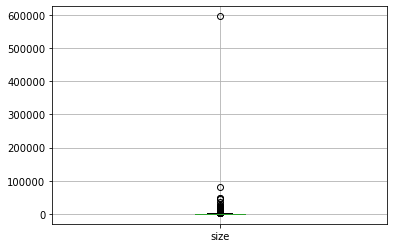

In [21]:
cleanData.boxplot("size")

In [22]:
cleanData.describe()

,streetwidth,size,Pricepm
count,1307.000000,1307.000000,1307.000000
mean,21.821729,2240.020658,2430.723030
std,11.687989,16988.193942,790.961899
min,5.000000,240.000000,706.000000
25%,15.000000,506.000000,1800.000000
50%,20.000000,780.000000,2600.000000
75%,25.000000,1200.000000,3100.000000
max,100.000000,595998.000000,3555.000000


## 2- Duplicate Data

In [23]:
data.duplicated().sum()

0

## 3- Data preprocessing

### 3.1 - one hot encoding